# Decision Tree Classification model using the famous titanic datasets.

*credits to kaggle for the datasets used in this project.*

In [4]:
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


**Importing drive to google Colab**

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
!mkdir ~/.kaggle
!cp /content/drive/MyDrive/kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

**Downloading the datasets using Kaggle API**

In [11]:
!kaggle competitions download -c titanic -p /content/data/




titanic.zip: Skipping, found more recently modified local copy (use --force to force download)


**Extracting Datasets using zipfile library**

In [13]:
import zipfile

# Replace "/path/to/your/zip/file" with the path to your downloaded zip file
with zipfile.ZipFile("/content/data/titanic.zip", 'r') as zip_ref:
    zip_ref.extractall("/content/data")


**Importing of Libraries**

In [76]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
import sklearn.tree as tree

**Importing of Data, Data Analysis, Data Preprocessing**

In [106]:
df_train = pd.read_csv("/content/data/train.csv")
df_test = pd.read_csv("/content/data/test.csv")
df_sub = pd.read_csv("/content/data/gender_submission.csv")


df_test2= pd.concat([df_test,df_sub], axis=1)
df_train = df_train.dropna()
df_test2 = df_test2.dropna()
df_sub = df_sub.dropna()

print(df_train.shape,df_test2.shape,df_sub.shape)






(183, 12) (87, 13) (418, 2)


In [91]:
print(df_train.shape,
df_test.shape,
df_sub.shape)

df_train['Embarked'].uni

(183, 12) (87, 11) (418, 2)


array(['C', 'S', 'Q'], dtype=object)

In [108]:
X = df_train[["Pclass","Sex","Age","Parch","Embarked"]].values
y = df_train["Survived"].values

In [109]:
X_test2 = df_test2[["Pclass","Sex","Age","Parch","Embarked"]].values
y_test2 = df_test2["Survived"].values
X

array([[1, 'female', 38.0, 0, 'C'],
       [1, 'female', 35.0, 0, 'S'],
       [1, 'male', 54.0, 0, 'S'],
       [3, 'female', 4.0, 1, 'S'],
       [1, 'female', 58.0, 0, 'S'],
       [2, 'male', 34.0, 0, 'S'],
       [1, 'male', 28.0, 0, 'S'],
       [1, 'male', 19.0, 2, 'S'],
       [1, 'female', 49.0, 0, 'C'],
       [1, 'male', 65.0, 1, 'C'],
       [1, 'male', 45.0, 0, 'S'],
       [2, 'female', 29.0, 0, 'S'],
       [3, 'male', 25.0, 0, 'S'],
       [1, 'female', 23.0, 2, 'S'],
       [1, 'male', 46.0, 0, 'S'],
       [1, 'male', 71.0, 0, 'C'],
       [1, 'male', 23.0, 1, 'C'],
       [1, 'male', 21.0, 1, 'S'],
       [1, 'male', 47.0, 0, 'S'],
       [1, 'male', 24.0, 1, 'C'],
       [2, 'female', 32.5, 0, 'S'],
       [1, 'male', 54.0, 1, 'S'],
       [1, 'female', 19.0, 2, 'S'],
       [1, 'male', 37.0, 0, 'S'],
       [1, 'male', 24.0, 0, 'C'],
       [2, 'male', 36.5, 2, 'S'],
       [1, 'female', 22.0, 0, 'S'],
       [1, 'male', 61.0, 0, 'S'],
       [1, 'male', 56.0, 0, '

Data Preprocessing

In [110]:
from sklearn import preprocessing
sex = preprocessing.LabelEncoder()
embarked = preprocessing.LabelEncoder()
sex.fit(['male','female'])
embarked.fit(["S","C","Q",'nan'])
X[:,1] = sex.transform(X[:,1])
X_test2[:,1] = sex.transform(X_test2[:,1])
X[:,4] = embarked.transform(X[:,4])
X_test2[:,4] = embarked.transform(X_test2[:,4])

X

array([[1, 0, 38.0, 0, 0],
       [1, 0, 35.0, 0, 2],
       [1, 1, 54.0, 0, 2],
       [3, 0, 4.0, 1, 2],
       [1, 0, 58.0, 0, 2],
       [2, 1, 34.0, 0, 2],
       [1, 1, 28.0, 0, 2],
       [1, 1, 19.0, 2, 2],
       [1, 0, 49.0, 0, 0],
       [1, 1, 65.0, 1, 0],
       [1, 1, 45.0, 0, 2],
       [2, 0, 29.0, 0, 2],
       [3, 1, 25.0, 0, 2],
       [1, 0, 23.0, 2, 2],
       [1, 1, 46.0, 0, 2],
       [1, 1, 71.0, 0, 0],
       [1, 1, 23.0, 1, 0],
       [1, 1, 21.0, 1, 2],
       [1, 1, 47.0, 0, 2],
       [1, 1, 24.0, 1, 0],
       [2, 0, 32.5, 0, 2],
       [1, 1, 54.0, 1, 2],
       [1, 0, 19.0, 2, 2],
       [1, 1, 37.0, 0, 2],
       [1, 1, 24.0, 0, 0],
       [2, 1, 36.5, 2, 2],
       [1, 0, 22.0, 0, 2],
       [1, 1, 61.0, 0, 2],
       [1, 1, 56.0, 0, 0],
       [1, 0, 50.0, 0, 0],
       [2, 1, 1.0, 1, 2],
       [2, 1, 3.0, 1, 2],
       [1, 0, 44.0, 0, 0],
       [1, 0, 58.0, 0, 0],
       [3, 0, 2.0, 1, 2],
       [1, 1, 40.0, 0, 0],
       [1, 0, 31.0, 0, 0],
     

**Building Decision Tree model**

In [111]:
titanic_tree = DecisionTreeClassifier(criterion="entropy", max_depth=4)
titanic_tree.fit(X,y)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

**Model Predictions**

In [112]:
pred_Tree = titanic_tree.predict(X_test2)

**Evaluation of model using accuracy_score**

In [113]:
from sklearn import metrics
import matplotlib.pyplot as plt
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_test2, pred_Tree))

DecisionTrees's Accuracy:  0.6896551724137931


**Data Visualization**

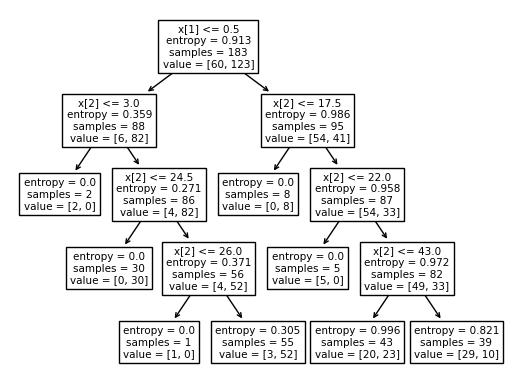

In [114]:
tree.plot_tree(titanic_tree)
plt.show()